<a href="https://colab.research.google.com/github/shankar045/1BM23CS309-ML-LAB/blob/main/1BM23CS309_ML_LAB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 10 rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0     

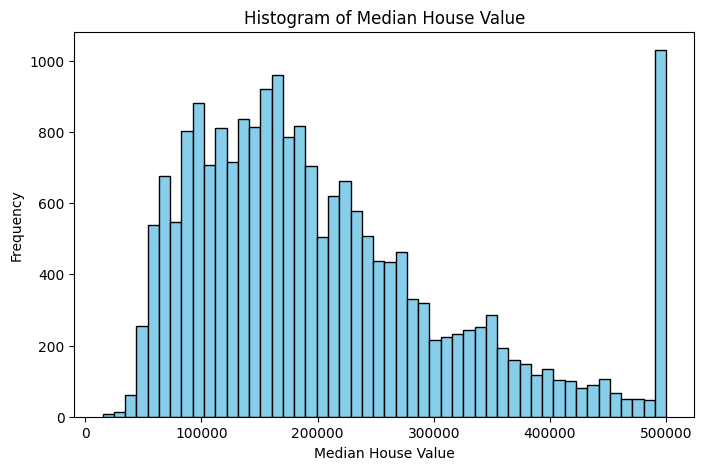

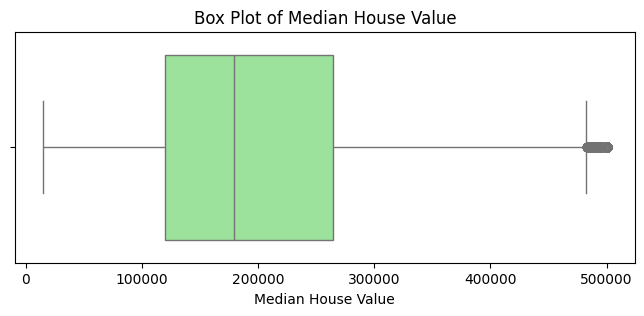

                    Missing Values  Percentage (%)
longitude                        0        0.000000
latitude                         0        0.000000
housing_median_age               0        0.000000
total_rooms                      0        0.000000
total_bedrooms                 207        1.002907
population                       0        0.000000
households                       0        0.000000
median_income                    0        0.000000
median_house_value               0        0.000000
ocean_proximity                  0        0.000000
0
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')
Training set size: 16512
Test set size: 4128
median_house_value    1.000000
median_income    

/tmp/ipython-input-167248694.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["total_bedrooms"].fillna(median_bedrooms, inplace=True)


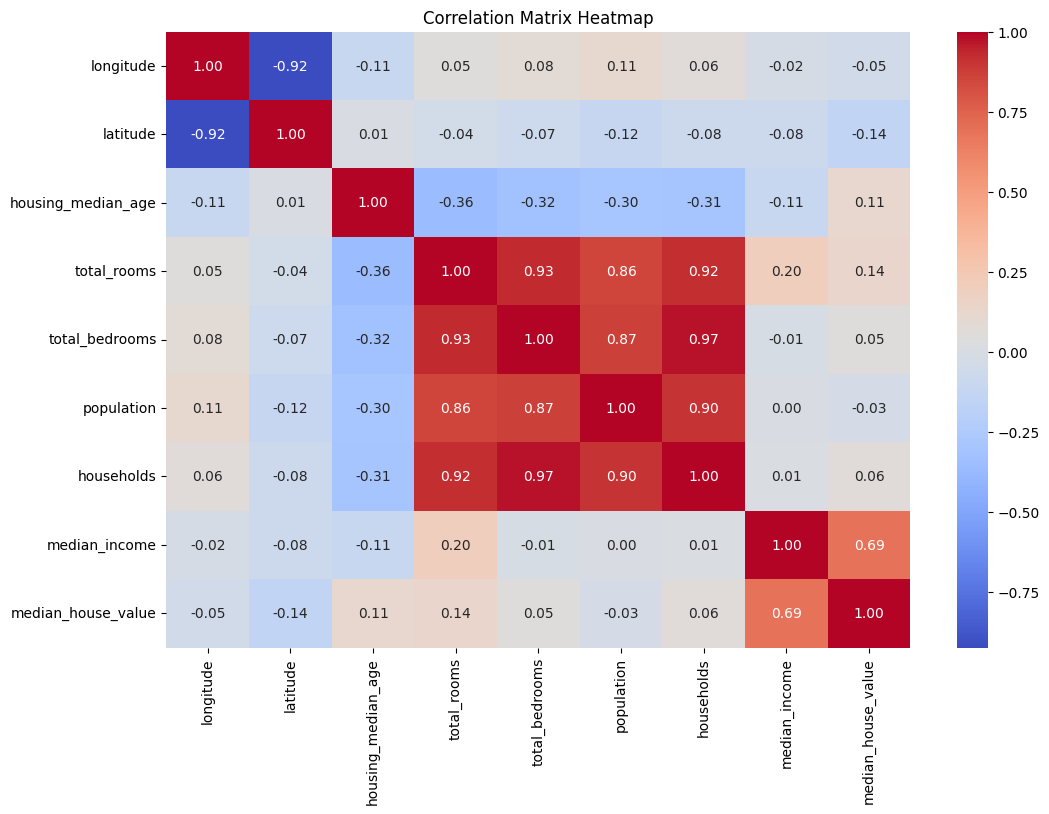

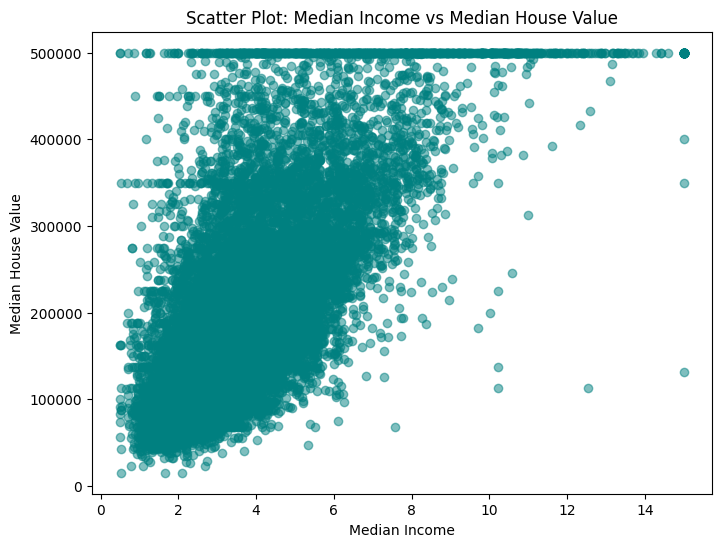

Training set size: (16512, 13)
Test set size: (4128, 13)
Top 3 positively correlated features:
 median_income                0.690647
ocean_proximity_<1H OCEAN    0.258544
ocean_proximity_NEAR BAY     0.162134
Name: median_house_value, dtype: float64

Most negatively correlated feature:
 ocean_proximity_INLAND   -0.482862
Name: median_house_value, dtype: float64
RMSE: 0.15, MAE: 0.11, R^2: 0.6139


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
housing = pd.read_csv(url)

print("First 10 rows of the dataset:")
print(housing.head(10))

print("\nData types of all attributes:")
print(housing.dtypes)

basic_stats = housing.describe().T
print(basic_stats)

plt.figure(figsize=(8, 5))
plt.hist(housing["median_house_value"], bins=50, color="skyblue", edgecolor="black")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Histogram of Median House Value")
plt.show()

plt.figure(figsize=(8, 3))
sns.boxplot(x=housing["median_house_value"], color="lightgreen")
plt.xlabel("Median House Value")
plt.title("Box Plot of Median House Value")
plt.show()

missing_counts = housing.isnull().sum()

missing_percentage = (missing_counts / len(housing)) * 100

missing_summary = pd.DataFrame({
    "Missing Values": missing_counts,
    "Percentage (%)": missing_percentage
})

print(missing_summary)

median_bedrooms = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median_bedrooms, inplace=True)

print(housing["total_bedrooms"].isnull().sum())

housing_encoded = pd.get_dummies(housing, columns=["ocean_proximity"])

print(housing_encoded.columns)


minmax_scaler = MinMaxScaler(feature_range=(0, 1))
num_cols = housing_encoded.select_dtypes(include=["int64", "float64"]).columns
housing_encoded[num_cols] = minmax_scaler.fit_transform(housing_encoded[num_cols])
housing_encoded.head()

housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1, 2, 3, 4, 5]
)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_idx].drop("income_cat", axis=1)
    strat_test_set = housing.loc[test_idx].drop("income_cat", axis=1)

print("Training set size:", len(strat_train_set))
print("Test set size:", len(strat_test_set))

num_attributes = strat_train_set.select_dtypes(include=["int64", "float64"])
corr_matrix = num_attributes.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(
    strat_train_set["median_income"],
    strat_train_set["median_house_value"],
    alpha=0.5,
    color="teal"
)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Scatter Plot: Median Income vs Median House Value")
plt.show()

X = housing_encoded.drop("median_house_value", axis=1)
y = housing_encoded["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


corr_target = X_train.join(y_train).corr()["median_house_value"].sort_values(ascending=False)

top3_positive = corr_target[1:4]
print("Top 3 positively correlated features:\n", top3_positive)

most_negative = corr_target[-1:]
print("\nMost negatively correlated feature:\n", most_negative)

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

X_train_scaled.head()


num_cols = X_train.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X_train.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), num_cols),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)
])

model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R^2: {r2:.4f}")
